In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import SparseCategoricalCrossentropy,mse,mae

In [9]:
data=pd.read_csv("drive/My Drive/Colab Notebooks/BostonHousing.csv")

In [10]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [64]:
X=data[['crim','age','tax']]
y=data['medv']
X.shape

(506, 3)

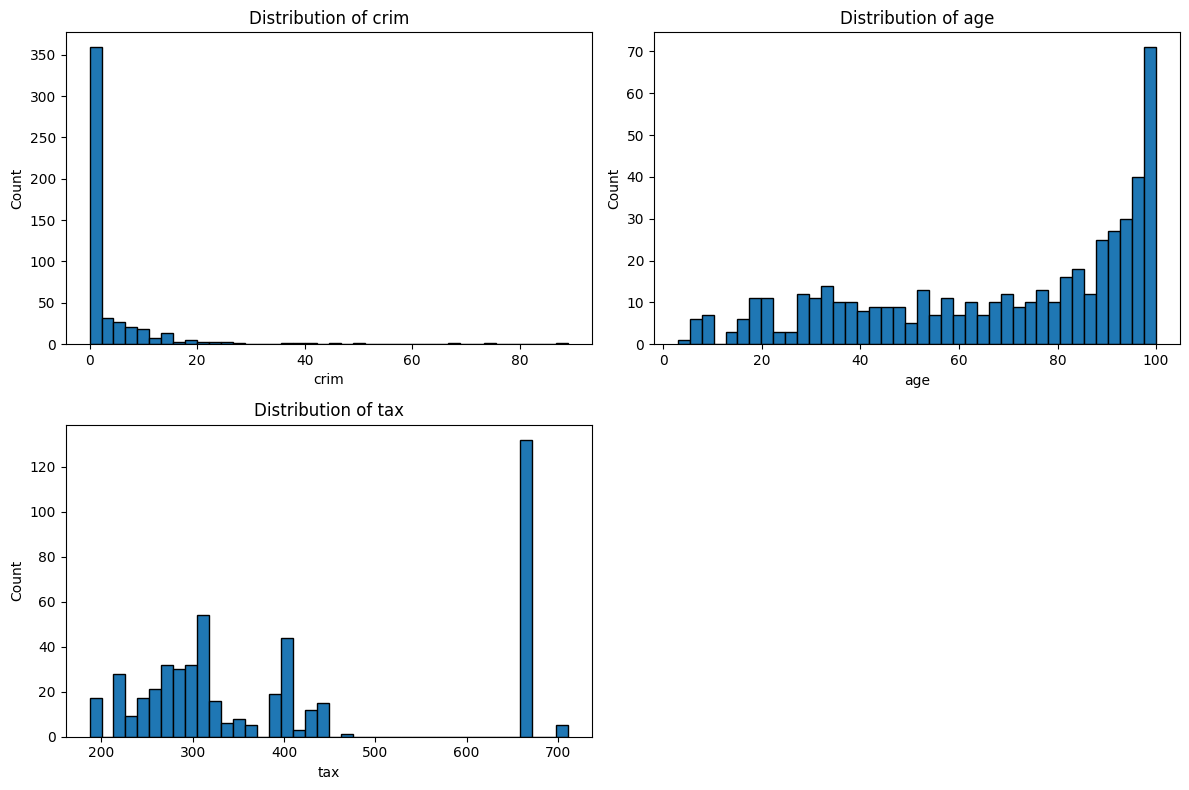

In [28]:
plt.figure(figsize=(12,8))
for i, col in enumerate(X, start=1):
  plt.subplot(2,2,i)
  plt.hist(data[col],bins=40 ,edgecolor='k')
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
plt.tight_layout()

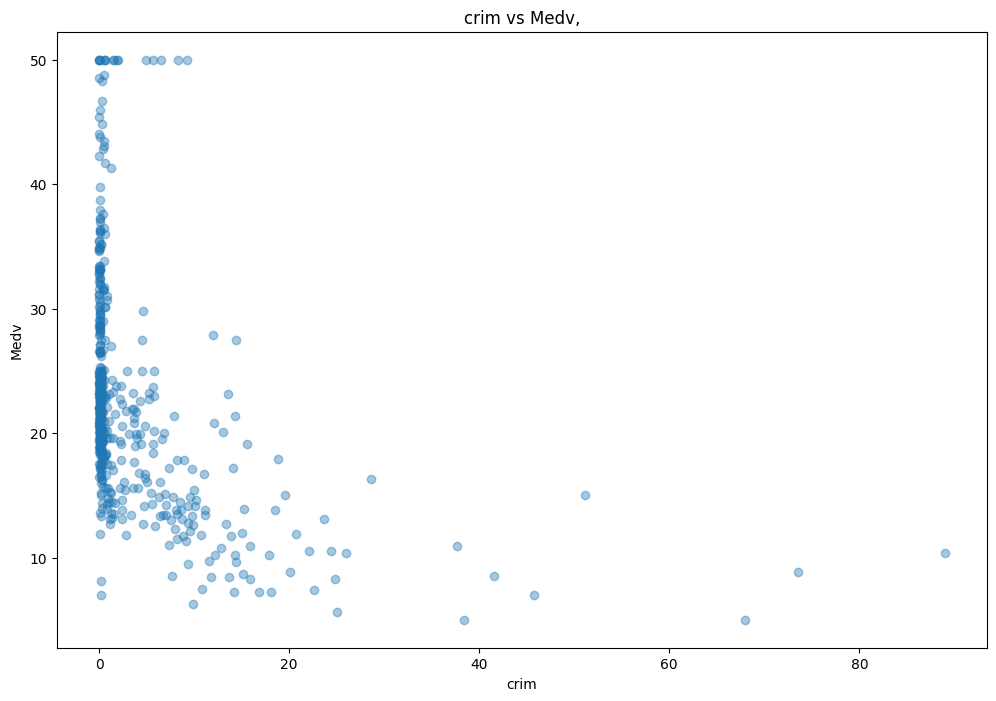

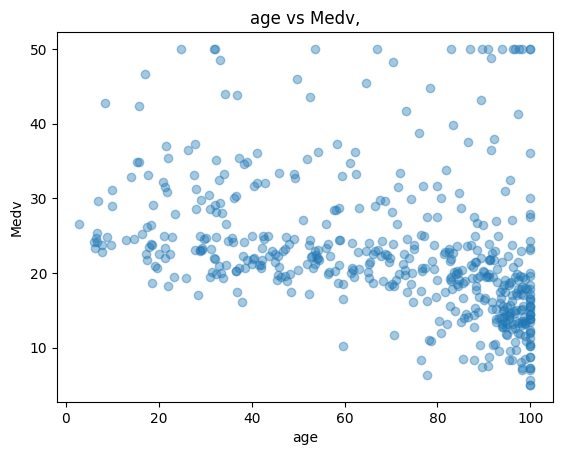

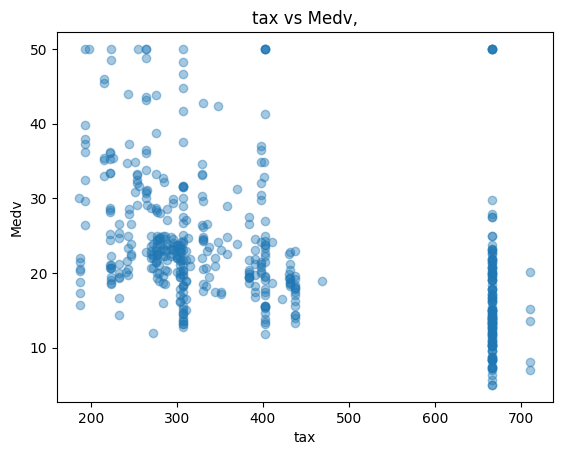

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(12,8))
for feature in X:
  plt.scatter(data[feature],y, alpha=0.4)
  plt.title(f"{feature} vs Medv,")
  plt.xlabel(feature)
  plt.ylabel("Medv")
  plt.show()
  plt.tight_layout()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_test

In [147]:
model = models.Sequential([
    layers.Dense(units=30, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(units=17, activation='relu'),
    layers.Dense(units=5,  activation='linear'),
    layers.Dense(units=1, activation='linear'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 30)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 17)             │           527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 5)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 743 (2.90 KB)

 Trainable params: 743 (2.90 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
loss_hist=model.fit(
    X_train,
    y_train,
    epochs = 100,
    validation_data = (X_test,y_test)
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 599.6733 - val_loss: 516.1415
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 584.4993 - val_loss: 503.3708
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 526.2801 - val_loss: 486.2564
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 594.9166 - val_loss: 461.5783
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 533.6766 - val_loss: 429.2189
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 435.4338 - val_loss: 386.8509
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 452.8822 - val_loss: 331.8984
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 390.8987 - val_loss: 267.7676
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 298.5540 - val_loss: 197.0918
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 243.9408 - val_loss: 131.7484
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 161.3631 - val_loss: 84.3099
Epoch 12/100
13/13

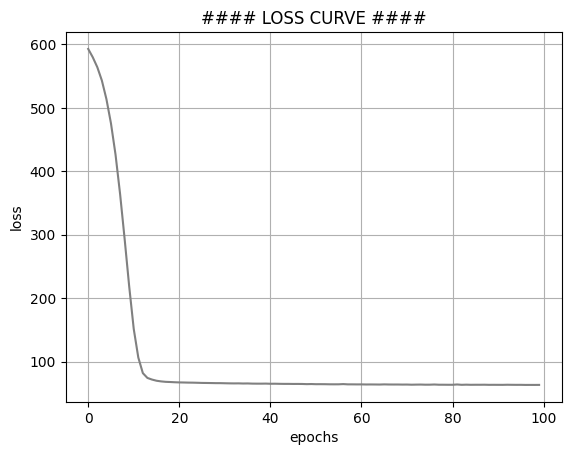

In [150]:
plt.plot(loss_hist.history['loss'],color='grey')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.title("#### LOSS CURVE ####")
plt.show()

In [145]:
new=[[0.00632,65.3,296]]
new_data=scaler.fit_transform(new)

In [146]:
model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[16.742931]], dtype=float32)

In [100]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
